#Actividad 5.2 Componentes Principales

#Carlos Dhali Tejeda Tapia - A00344820

#1. Datos


In [4]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Cargar datos
df = pd.read_csv("/content/sample_data/Country-data.csv")

# Separar las variables
country_names = df["country"]
data = df.drop(columns=["country"])
target = data["gdpp"]
predictors = data.drop(columns=["gdpp"])


#2. Regresión lineal múltiple con todas las variables originales

In [5]:
# Agregar intercepto
X = sm.add_constant(predictors)

# Ajustar el modelo
model = sm.OLS(target, X).fit()

# Mostrar el resumen del modelo
print(model.summary())

# Calcular VIF para evaluar multicolinealidad
vif_data = pd.DataFrame()
vif_data["Variable"] = predictors.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i + 1) for i in range(len(predictors.columns))]
print("\nVIF:\n", vif_data)


                            OLS Regression Results                            
Dep. Variable:                   gdpp   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     127.7
Date:                Tue, 19 Nov 2024   Prob (F-statistic):           6.13e-65
Time:                        20:49:36   Log-Likelihood:                -1707.9
No. Observations:                 167   AIC:                             3434.
Df Residuals:                     158   BIC:                             3462.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.193e+04   1.11e+04     -3.768      0.0

#La R^2  y R^2 ajustada tienen valores similares de 86 porciento lo que indica que las variables predictoras explican muy bien los cambios en el gdpp. Además que la R^2 ajustada sea casi exactamente igual que la R^2 nos indica que todas las variables predictoras están aportando de manera significativa al modelo de regresión.

#Tomando en cuenta los p-values de cada variable predictora podemos llegar a estas conclusiones:

#Variables significativas:

#health, income, y life_expec tienen un efecto estadísticamente significativo sobre gdpp.
#child_mort e inflation tienen un efecto marginalmente significativo.

#Variables no significativas:

#exports, imports, y total_fer no tienen un efecto significativo sobre gdpp en este modelo.

#Multicolinealidad (VIF):

#Valores de VIF > 5 (child_mort y life_expec) indican multicolinealidad moderada. Esto puede afectar la estabilidad de los coeficientes y su significancia estadística.
#Para mitigar, se podría considerar eliminar o transformar estas variables, o aplicar técnicas como Componentes Principales.
#Condición del modelo (5.39e+05):

#Un número de condición alto indica posibles problemas numéricos o multicolinealidad en el modelo. Esto concuerda con los valores de VIF observados.
#Distribución de residuos (Omnibus y Jarque-Bera):

#Los residuos no son normales (p < 0.001). Esto puede afectar la interpretación de los intervalos de confianza y los valores p.
#Durbin-Watson (1.914):

#Indica que no hay problemas graves de autocorrelación en los residuos.


#3. Aplicar PCA para reducir dimensionalidad

In [6]:
# Escalar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(predictors)

# Aplicar PCA
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

# Calcular la varianza explicada acumulada
explained_variance = np.cumsum(pca.explained_variance_ratio_)
print("\nVarianza explicada acumulada:", explained_variance)

# Seleccionar el número de componentes que explican al menos el 80% de la varianza
n_components = np.argmax(explained_variance >= 0.8) + 1
print(f"\nNúmero de componentes seleccionados: {n_components}")

# Reducir los datos a los componentes principales seleccionados
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(scaled_data)

# Obtener las direcciones de los componentes principales
loadings = pca.components_.T
print("\nDirecciones de los componentes principales (loadings):")
for i, loading in enumerate(loadings.T):
    print(f"PC{i+1}: {loading}")



Varianza explicada acumulada: [0.4468279  0.63982116 0.78524283 0.87759173 0.94786687 0.97580278
 0.98936981 1.        ]

Número de componentes seleccionados: 4

Direcciones de los componentes principales (loadings):
PC1: [ 0.47287988 -0.30839609 -0.14456816 -0.19464001 -0.38678706  0.22047498
 -0.46419134  0.45695156]
PC2: [ 0.21412406  0.60837422 -0.24160817  0.66113128  0.03120652  0.00577075
 -0.23734341  0.17670197]
PC3: [ 0.09998804 -0.14603735  0.64740271  0.28525732 -0.24777586 -0.6157768
 -0.15808191  0.05108475]
PC4: [0.11518655 0.10150821 0.68015594 0.05636071 0.31502867 0.62129198
 0.00385699 0.15930427]


#Explicación del procedimiento:
#El objetivo del PCA es reducir la dimensionalidad de los datos transformando las variables originales en un conjunto más pequeño de componentes principales (PCs). Estos componentes son combinaciones lineales de las variables originales que explican la mayor cantidad posible de varianza en los datos.

#Varianza explicada acumulada: [0.4468, 0.6398, 0.7852, 0.8776]
#El primer componente (PC1) explica el 44.68% de la varianza total.
#Los primeros 4 componentes explican el 87.76% de la varianza total, lo que implica que estos cuatro componentes capturan la mayoría de la información presente en los datos.
#Decisión: Se seleccionan los primeros 4 componentes principales porque explican más del 80% de la varianza acumulada, cumpliendo el criterio establecido.

#Valores propios (eigenvalues):
#Los valores propios asociados a cada componente reflejan la cantidad de varianza explicada por cada PC. Los cuatro primeros tienen los valores propios más altos, lo que valida su selección.

#Agrupaciones de los datos:
#Los pesos altos en PC1 y PC2 sugieren que existen diferencias notables entre países con base en factores demográficos y económicos. Los países con valores similares en estos componentes podrían agruparse en clústeres con características comunes.

#4. Obtener ecuaciones de transformación lineal

In [7]:
# Generar ecuaciones aproximadas
component_names = [f"PC{i+1}" for i in range(n_components)]
for i, load in enumerate(loadings.T):
    component_eq = " + ".join([f"{round(l, 2)}*{col}" for l, col in zip(load, predictors.columns)])
    print(f"{component_names[i]} = {component_eq}")


PC1 = 0.47*child_mort + -0.31*exports + -0.14*health + -0.19*imports + -0.39*income + 0.22*inflation + -0.46*life_expec + 0.46*total_fer
PC2 = 0.21*child_mort + 0.61*exports + -0.24*health + 0.66*imports + 0.03*income + 0.01*inflation + -0.24*life_expec + 0.18*total_fer
PC3 = 0.1*child_mort + -0.15*exports + 0.65*health + 0.29*imports + -0.25*income + -0.62*inflation + -0.16*life_expec + 0.05*total_fer
PC4 = 0.12*child_mort + 0.1*exports + 0.68*health + 0.06*imports + 0.32*income + 0.62*inflation + 0.0*life_expec + 0.16*total_fer


#5. Regresión lineal múltiple con los componentes principales seleccionados

In [8]:
# Agregar intercepto
X_pca = sm.add_constant(principal_components)

# Ajustar el modelo
model_pca = sm.OLS(target, X_pca).fit()

# Mostrar el resumen del modelo
print(model_pca.summary())

                            OLS Regression Results                            
Dep. Variable:                   gdpp   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     63.36
Date:                Tue, 19 Nov 2024   Prob (F-statistic):           3.76e-32
Time:                        20:49:46   Log-Likelihood:                -1797.1
No. Observations:                 167   AIC:                             3604.
Df Residuals:                     162   BIC:                             3620.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.296e+04    896.556     14.460      0.0

#Estadísticas generales del modelo:
#R-squared (R²): 0.610

#Aproximadamente el 61% de la variación en el PIB per cápita (gdpp) se explica por los cuatro componentes principales seleccionados.
#Esto indica un ajuste moderado del modelo, aunque inferior al R² obtenido con las variables originales (0.866). La reducción en R² es esperada debido a la pérdida de información durante la reducción de dimensionalidad.
#Adj. R-squared: 0.600

#Este valor ajusta el R² teniendo en cuenta el número de predictores en el modelo. Similar al R², muestra que el modelo tiene un ajuste razonable.
#F-statistic: 63.36, Prob (F-statistic): 3.76e-32

#La prueba F evalúa si el modelo, como un todo, es significativo. Dado que el valor p es muy bajo (<0.05), el modelo es estadísticamente significativo.

#PC1 (-6705.68):
#PC1 está asociado negativamente con el PIB, lo que implica que las combinaciones de variables originales que pesan más en este componente (como child_mort, life_expec, y total_fer) tienen un efecto adverso en el PIB. Esto tiene sentido, ya que mayores tasas de mortalidad infantil y fertilidad suelen estar correlacionadas con economías menos desarrolladas.

#PC4 (7493.70):
#PC4 tiene un coeficiente positivo significativo, lo que indica que las variables relacionadas con este componente (como health, inflation) tienen un impacto positivo neto en el PIB. Es decir, mejoras en la inversión en salud o reducción de la inflación podrían estar vinculadas a un mayor desarrollo económico.

#Coeficientes no significativos (PC2 y PC3):
#Aunque estos componentes explican parte de la varianza en los datos, sus coeficientes no son estadísticamente significativos. Esto podría deberse a que las combinaciones lineales asociadas con PC2 (comercio internacional) y PC3 (salud y estabilidad económica) no tienen una relación fuerte o consistente con el PIB en este conjunto de datos.

#Diagnósticos del modelo:
#Omnibus: 48.034, Jarque-Bera: 114.651, Prob(JB): 1.27e-25
#Estos indicadores sugieren que los residuos no siguen una distribución normal. Esto podría indicar la necesidad de explorar transformaciones adicionales para la variable objetivo (gdpp).

#Durbin-Watson: 2.179
#El valor está cercano a 2, lo que sugiere que no hay autocorrelación en los residuos del modelo.

#Cond. No.: 2.20
#Este valor bajo indica que no hay problemas de multicolinealidad severa, lo cual era esperado porque el PCA elimina la multicolinealidad entre las variables predictoras.

#6. Comparar los modelos antes y después del PCA

In [9]:
print("\nComparación de los modelos:")
print("- Modelo original:")
print(model.summary())
print("\n- Modelo con PCA:")
print(model_pca.summary())



Comparación de los modelos:
- Modelo original:
                            OLS Regression Results                            
Dep. Variable:                   gdpp   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     127.7
Date:                Tue, 19 Nov 2024   Prob (F-statistic):           6.13e-65
Time:                        20:49:53   Log-Likelihood:                -1707.9
No. Observations:                 167   AIC:                             3434.
Df Residuals:                     158   BIC:                             3462.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cons

#Reducción de dimensionalidad:
#El modelo con componentes principales es más parsimonioso, con solo 4 predictores en lugar de las 8 variables originales. Esto simplifica la interpretación y evita problemas de multicolinealidad.

#Variables más influyentes:

#PC1 y PC4 tienen efectos significativos sobre el PIB (gdpp).
#PC1 representa factores demográficos (mortalidad infantil, esperanza de vida), que impactan negativamente el PIB.
#PC4 incluye factores económicos (salud e inflación) que tienen un impacto positivo.
#Limitaciones:

#Aunque el modelo explica un porcentaje razonable de la varianza, su capacidad predictiva es inferior al modelo con las variables originales.
#La no normalidad de los residuos sugiere que podría ser necesario investigar otras transformaciones o modelos.

#7. Análisis de conglomerados utilizando los componentes principales

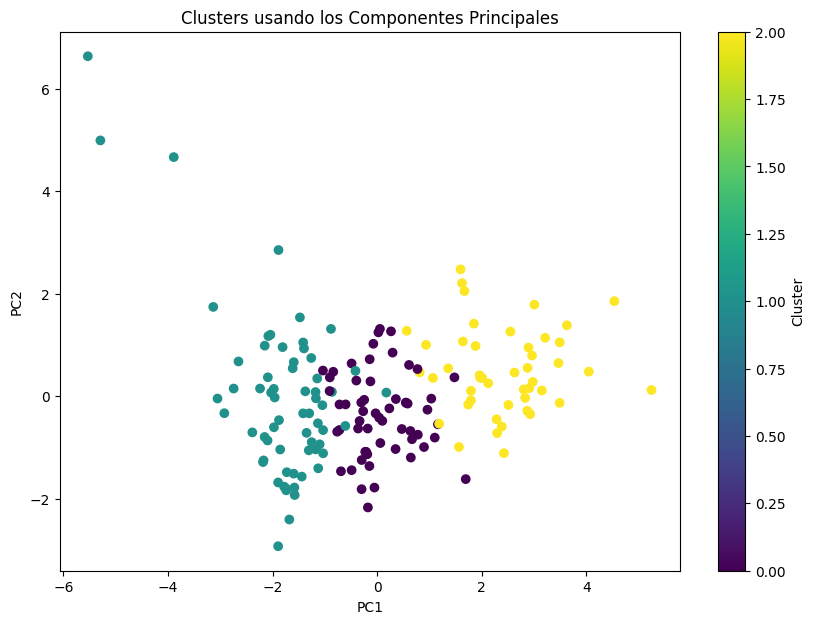

In [10]:
# Aplicar K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(principal_components)

# Agregar los clusters al dataframe
df["Cluster"] = clusters

# Visualizar los clusters
plt.figure(figsize=(10, 7))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters, cmap="viridis")
plt.title("Clusters usando los Componentes Principales")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Cluster")
plt.show()
